In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import minimize

sns.set(context="talk")

In [2]:
df = pd.read_csv("ex2data1.txt", names=["Exam1", "Exam2", "Admitted"])
df.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


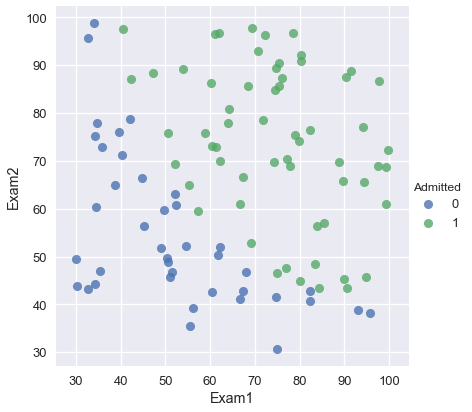

In [3]:
sns.lmplot(x="Exam1", y="Exam2", data=df,
           fit_reg=False, # No regression line, 
           hue="Admitted",
           size=6, # Height in inch
           aspect=1)  # Ratio of width to height
plt.show()

**Define hypothesis and cost function**

In [4]:
# Logistic regression function
def hypo(theta, X):
    h = 1 / (1 + np.exp(-X.dot(theta)))
    return h.reshape((-1, 1))

# Cost function
def costFun(theta, X, y):
    m = len(y)
    h = hypo(theta, X)
    return 1/m * np.sum(-y*np.log(h) - (1-y)*np.log(1-h))

# Gradient function
def gradient(theta, X, y):
    m = len(y)
    h = hypo(theta, X)
    gradient = 1/m * (h - y).T.dot(X)
    return gradient.ravel()

# Map Feature
def mapFeature(X, degree=1):
    if X.ndim == 1:
        X = X.reshape(1, -1)
    nrows = X.shape[0]
    ncols = int((degree+2)*(degree+1)/2)
    mapX = np.ones((nrows, ncols))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            mapX[:, int((i+1)*i/2)+j] = (X[:, 0]**(i-j))*(X[:, 1]**j)
    return mapX

X = df.values[:, 0:len(df.columns)-1]
degree = 1
X = mapFeature(X, degree)
y = df.values[:, len(df.columns)-1:len(df.columns)]
theta = np.zeros([X.shape[1]])

**Minimize cost function and find learned parameters theta**

In [5]:
res = minimize(costFun, theta, args=(X, y), jac=gradient, method="TNC")
print(res)

     fun: 0.20349770158947389
     jac: array([  8.82211045e-09,   7.15502435e-08,   4.77210976e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131881,   0.20623159,   0.20147149])


**Plot decision boundary with scatter plot of data**

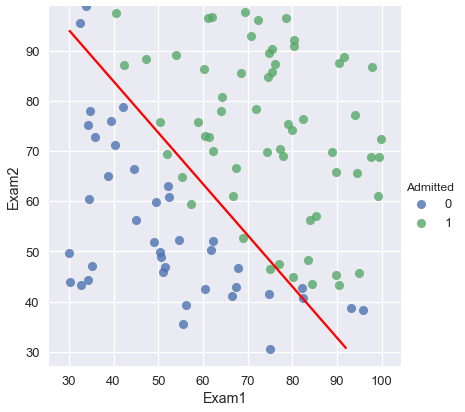

In [6]:
# Plot scatter
sns.lmplot(x="Exam1", y="Exam2", data=df,
           fit_reg=False, # No regression line, 
           hue="Admitted",
           size=6, # Height in inch
           aspect=1)  # Ratio of width to height
# Plot decision line
x_plot = np.linspace(df.Exam1.min(), df.Exam1.max(), 100)
y_plot = np.linspace(df.Exam2.min(), df.Exam2.max(), 100)
z_plot = np.zeros((len(x_plot), len(y_plot)))
for i in range(len(x_plot)):
    for j in range(len(y_plot)):
        x_predict = np.array([x_plot[i], y_plot[j]])
        x_predict = mapFeature(x_predict, degree)
        z_plot[i, j] = hypo(res.x, x_predict)[0]
plt.contour(x_plot, y_plot, z_plot.T, [0.5], colors="red")
plt.show()

**Evaluating logistic regression**

In [7]:
def predict(theta, X):
    return (hypo(theta, X)>=0.5).astype(np.float)

accuracy = np.mean((predict(res.x, X)==y).astype(np.float))
print("Accuracy = {0}%".format(accuracy*100))

Accuracy = 89.0%
